14239483000.0
Epoch: 0050 cost= 14239482880.000000 W= 8703.536 b= 1449.4785
6775188000.0
Epoch: 0100 cost= 6775187968.000000 W= 14706.418 b= 2449.9597
3223652600.0
Epoch: 0150 cost= 3223652608.000000 W= 18847.117 b= 3140.076
1533822600.0
Epoch: 0200 cost= 1533822592.000000 W= 21703.309 b= 3616.1072
729796740.0
Epoch: 0250 cost= 729796736.000000 W= 23673.465 b= 3944.4668
347238180.0
Epoch: 0300 cost= 347238176.000000 W= 25032.451 b= 4170.963
165217280.0
Epoch: 0350 cost= 165217280.000000 W= 25969.852 b= 4327.1963
78610940.0
Epoch: 0400 cost= 78610944.000000 W= 26616.457 b= 4434.964
37403736.0
Epoch: 0450 cost= 37403736.000000 W= 27062.473 b= 4509.302
17796534.0
Epoch: 0500 cost= 17796534.000000 W= 27370.139 b= 4560.579
8467554.0
Epoch: 0550 cost= 8467554.000000 W= 27582.357 b= 4595.9478
4028927.0
Epoch: 0600 cost= 4028927.000000 W= 27728.738 b= 4620.3447
1917056.6
Epoch: 0650 cost= 1917056.625000 W= 27829.707 b= 4637.1733
912084.7
Epoch: 0700 cost= 912084.687500 W= 27899.363 b= 4648.781

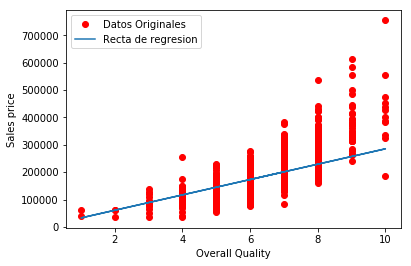

In [60]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.load('proyecto_training_data.npy')
train_data_length = (int)(data.shape[0] * 0.8)
train_data = data[0:train_data_length,:]
test_data = data[train_data_length:,:]

sale_price_train_d = (train_data[:,0]).astype(np.float32)
overall_quality_train_d = (train_data[:,1]).astype(np.float32)

sale_price_test_d = test_data[:,0]
overall_quality_test_d = test_data[:,1]

tf.reset_default_graph()

# graph = tf.Graph()
# with graph.as_default():
X = tf.placeholder("float", name="Overall")
Y = tf.placeholder("float", name="Sales")

w = tf.Variable(np.random.randn(), dtype = tf.float32, name = 'W')
b = tf.Variable(np.random.randn(), dtype = tf.float32, name = 'b')

y_pred = (x* w) + b

learning_rate = 0.0001

loss = tf.reduce_mean(tf.square(y - y_pred, name='cost'))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    for epoch in range(2000):
        sess.run(optimizer, feed_dict={X: overall_quality_train_d, Y: sale_price_train_d})

        if (epoch+1) % 50 == 0:
            c = sess.run(loss, feed_dict={X: overall_quality_train_d, Y:sale_price_train_d})
            print(c)
            print("Epoch:", '%04d' % (epoch+1), "cost=", '%f' % c, \
                "W=", sess.run(w), "b=", sess.run(b))

    print("Optimización finalizada!")
    training_cost = sess.run(loss, feed_dict={X: overall_quality_train_d, Y: sale_price_train_d})
    print("Training cost=", training_cost, "W=", sess.run(w), "b=", sess.run(b), '\n')

    # Mostramos resultados
    plt.plot(overall_quality_train_d, sale_price_train_d, 'ro', label='Datos Originales')

    #Para el ejemplo de ventas
    plt.xlabel("Overall Quality")
    plt.ylabel("Sales price")

    #Para el ejemplo de aleatorio
    #plt.xlabel("Valor fijo")
    #plt.ylabel("Valares tomados")

    plt.plot(overall_quality_train_d, sess.run(w) * overall_quality_train_d + sess.run(b), label='Recta de regresion')
    plt.legend()
    plt.show()
writer.close()